In [2]:
import numpy as np
import pandas as pd
import itertools
import copy

import random
random.seed(0)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

from statistics import mean

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# from mlxtend.plotting import plot_decision_regions
# from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

# from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

from math import log2, sqrt, isnan
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
# import pydotplus
# from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from keras import backend as K
from keras import callbacks

from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

Using TensorFlow backend.


In [3]:
df_2015 = pd.read_csv('../data/csv/happiness_2015.csv')
df_2015.head()

,Unnamed: 0,country_id,Country,Code,Region,HappinessRank,HappinessScore,StandardError,Economy_GDPperCapita,Family,Health_LifeExpectancy,Freedom,Trust_GovernmentCorruption,Generosity,DystopiaResidual,Latitude,Longitude
0,0,1,Afghanistan,AF,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,33.939110,67.709953
1,1,2,Albania,AL,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,41.153332,20.168331
2,2,3,Algeria,DZ,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,28.033886,1.659626
3,3,4,Angola,AO,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,-11.202692,17.873887
4,4,5,Argentina,AR,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,-38.416097,-63.616672


In [4]:
df_2016 = pd.read_csv('../data/csv/happiness_2016.csv')
df_2016.head()

,Unnamed: 0,country_id,Country,Code,Region,HappinessRank,HappinessScore,LowerConfidenceInterval,UpperConfidenceInterval,Economy_GDPperCapita,Family,Health_LifeExpectancy,Freedom,Trust_GovernmentCorruption,Generosity,DystopiaResidual,Latitude,Longitude
0,0,1,Afghanistan,AF,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,33.939110,67.709953
1,1,2,Albania,AL,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,41.153332,20.168331
2,2,3,Algeria,DZ,Middle East and Northern Africa,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,28.033886,1.659626
3,3,4,Angola,AO,Sub-Saharan Africa,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459,-11.202692,17.873887
4,4,5,Argentina,AR,Latin America and Caribbean,26,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985,-38.416097,-63.616672


In [5]:
df_2017 = pd.read_csv('../data/csv/happiness_2017.csv')
df_2017.head()

,Unnamed: 0,country_id,Country,Code,HappinessRank,HappinessScore,Whiskerhigh,Whiskerlow,Economy_GDPperCapita,Family,Health_LifeExpectancy,Freedom,Generosity,Trust_GovernmentCorruption,DystopiaResidual,Latitude,Longitude
0,0,1,Afghanistan,AF,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,33.939110,67.709953
1,1,2,Albania,AL,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,41.153332,20.168331
2,2,3,Algeria,DZ,53,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,28.033886,1.659626
3,3,4,Angola,AO,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,-11.202692,17.873887
4,4,5,Argentina,AR,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,-38.416097,-63.616672


In [6]:
df_2015.shape

(158, 17)

In [7]:
df_2016.shape

(157, 18)

In [8]:
df_2017.shape

(155, 17)

In [9]:
df_2015.columns

Index(['Unnamed: 0', 'country_id', 'Country', 'Code', 'Region',
       'HappinessRank', 'HappinessScore', 'StandardError',
       'Economy_GDPperCapita', 'Family', 'Health_LifeExpectancy', 'Freedom',
       'Trust_GovernmentCorruption', 'Generosity', 'DystopiaResidual',
       'Latitude', 'Longitude'],
      dtype='object')

In [10]:
df_2016.columns

Index(['Unnamed: 0', 'country_id', 'Country', 'Code', 'Region',
       'HappinessRank', 'HappinessScore', 'LowerConfidenceInterval',
       'UpperConfidenceInterval', 'Economy_GDPperCapita', 'Family',
       'Health_LifeExpectancy', 'Freedom', 'Trust_GovernmentCorruption',
       'Generosity', 'DystopiaResidual', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
df_2017.columns

Index(['Unnamed: 0', 'country_id', 'Country', 'Code', 'HappinessRank',
       'HappinessScore', 'Whiskerhigh', 'Whiskerlow', 'Economy_GDPperCapita',
       'Family', 'Health_LifeExpectancy', 'Freedom', 'Generosity',
       'Trust_GovernmentCorruption', 'DystopiaResidual', 'Latitude',
       'Longitude'],
      dtype='object')

In [12]:
final_2015 = df_2015[['country_id', 'Country', 'Code',
       'HappinessRank', 'HappinessScore', 'Economy_GDPperCapita', 'Family', 'Health_LifeExpectancy', 'Freedom',
       'Trust_GovernmentCorruption', 'Generosity', 'DystopiaResidual']]
final_2015.shape

(158, 12)

In [13]:
final_2016 = df_2016[['country_id', 'Country', 'Code',
       'HappinessRank', 'HappinessScore', 'Economy_GDPperCapita', 'Family',
       'Health_LifeExpectancy', 'Freedom', 'Trust_GovernmentCorruption',
       'Generosity', 'DystopiaResidual' ]]
final_2016.shape

(157, 12)

In [14]:
final_2017 = df_2017[['country_id', 'Country', 'Code',
       'HappinessRank', 'HappinessScore', 'Economy_GDPperCapita', 'Family',
       'Health_LifeExpectancy', 'Freedom', 'Trust_GovernmentCorruption',
       'Generosity', 'DystopiaResidual' ]]
final_2017.shape

(155, 12)

In [15]:
frames = [final_2015, final_2016, final_2017]
final_df = pd.concat(frames)

In [16]:
final_df.head()

,country_id,Country,Code,HappinessRank,HappinessScore,Economy_GDPperCapita,Family,Health_LifeExpectancy,Freedom,Trust_GovernmentCorruption,Generosity,DystopiaResidual
0,1,Afghanistan,AF,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,2,Albania,AL,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,3,Algeria,DZ,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,4,Angola,AO,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,5,Argentina,AR,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [17]:
final_df.shape

(470, 12)

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_id                  470 non-null    int64  
 1   Country                     470 non-null    object 
 2   Code                        468 non-null    object 
 3   HappinessRank               470 non-null    int64  
 4   HappinessScore              470 non-null    float64
 5   Economy_GDPperCapita        470 non-null    float64
 6   Family                      470 non-null    float64
 7   Health_LifeExpectancy       470 non-null    float64
 8   Freedom                     470 non-null    float64
 9   Trust_GovernmentCorruption  470 non-null    float64
 10  Generosity                  470 non-null    float64
 11  DystopiaResidual            470 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 47.7+ KB


<AxesSubplot:xlabel='Health_LifeExpectancy', ylabel='HappinessScore'>

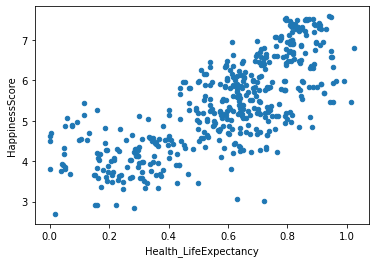

In [19]:
# How does healthy life expectancy affect the happiness score?
final_df.plot.scatter(x= 'Health_LifeExpectancy', y='HappinessScore')

<AxesSubplot:xlabel='Economy_GDPperCapita', ylabel='HappinessScore'>

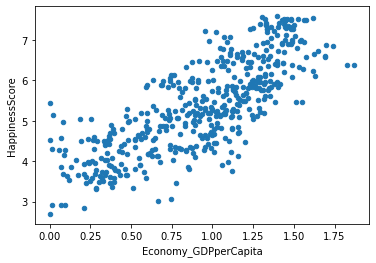

In [20]:
# How does GDP affect the happiness score?
final_df.plot.scatter(x= 'Economy_GDPperCapita', y='HappinessScore')

<AxesSubplot:xlabel='Family', ylabel='HappinessScore'>

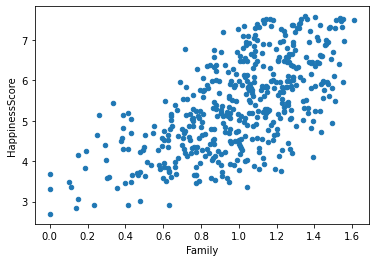

In [21]:
# How does Family Support affect the happiness score?
final_df.plot.scatter(x= 'Family', y='HappinessScore')

<AxesSubplot:xlabel='Freedom', ylabel='HappinessScore'>

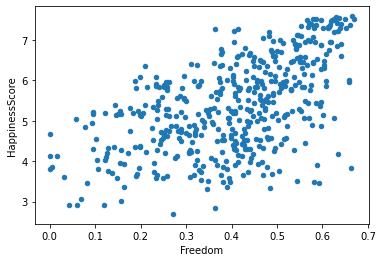

In [22]:
# How does Freedom affect the happiness score?
final_df.plot.scatter(x= 'Freedom', y='HappinessScore')

<AxesSubplot:xlabel='Trust_GovernmentCorruption', ylabel='HappinessScore'>

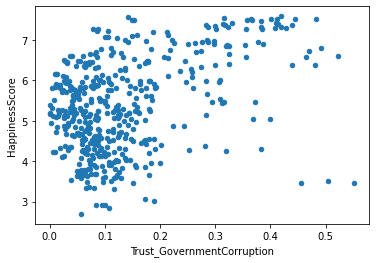

In [23]:
# How does Corruption affect the happiness score?
final_df.plot.scatter(x= 'Trust_GovernmentCorruption', y='HappinessScore')

<AxesSubplot:xlabel='Generosity', ylabel='HappinessScore'>

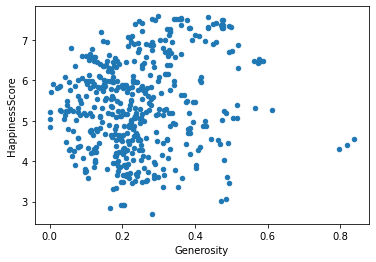

In [24]:
# How does Generosity affect the happiness score?
final_df.plot.scatter(x= 'Generosity', y='HappinessScore')

<AxesSubplot:xlabel='DystopiaResidual', ylabel='HappinessScore'>

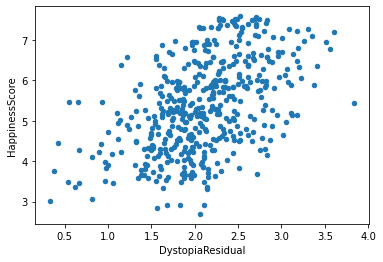

In [25]:
# How does DystopiaResidual affect the happiness score?
final_df.plot.scatter(x= 'DystopiaResidual', y='HappinessScore')

In [26]:
# Drop the country_id Country and Code columns as they are mere labels
final_df.drop(columns=['country_id', 'Country', 'Code', 'HappinessRank'], axis=1, inplace=True)

In [27]:
final_df.head()

,HappinessScore,Economy_GDPperCapita,Family,Health_LifeExpectancy,Freedom,Trust_GovernmentCorruption,Generosity,DystopiaResidual
0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [28]:
# Checking how many of the cells have null values and what percent of each feature is null to later determine 
# how we will deal with them. It can be seen that there are no null values in any of the columns
final_df.isnull().sum()

HappinessScore                0
Economy_GDPperCapita          0
Family                        0
Health_LifeExpectancy         0
Freedom                       0
Trust_GovernmentCorruption    0
Generosity                    0
DystopiaResidual              0
dtype: int64

In [29]:
# Correlation with Target feature. All features seem correlated with our target feature, thsu we will drop none
final_df.corr()['HappinessScore']

HappinessScore                1.000000
Economy_GDPperCapita          0.785450
Family                        0.636532
Health_LifeExpectancy         0.748040
Freedom                       0.560353
Trust_GovernmentCorruption    0.406340
Generosity                    0.163562
DystopiaResidual              0.489747
Name: HappinessScore, dtype: float64

In [30]:
# Split the data
X = final_df.iloc[:,1:]
y = final_df.iloc[:, 0]
X.head()

,Economy_GDPperCapita,Family,Health_LifeExpectancy,Freedom,Trust_GovernmentCorruption,Generosity,DystopiaResidual
0,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [31]:
y.head()

0    3.575
1    4.959
2    5.605
3    4.033
4    6.574
Name: HappinessScore, dtype: float64

In [32]:
# Split the X and y into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [33]:
# Scaling features
scaler = Normalizer().fit(X_train) 
LR_X_train = scaler.transform(X_train) 
LR_X_test = scaler.transform(X_test)

In [34]:
# Standard Linear Regression
reg = LinearRegression().fit(LR_X_train, y_train)
y_pred = reg.predict(LR_X_test)
r2 = r2_score(y_test, y_pred)
print("Standard linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Standard linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Standard linear regression R2 =  0.3632276543663696 

Standard linear regression coefficients :
Economy_GDPperCapita : 7.416698023274023
Family : 4.299372358286932
Health_LifeExpectancy : 3.890709928345486
Freedom : 3.50190737355315
Trust_GovernmentCorruption : 6.607068048254094
Generosity : -1.3549407931513997
DystopiaResidual : 10.055969666186387


In [35]:
# Ridge Regression
ridge_reg = Ridge().fit(LR_X_train, y_train)
y_pred = ridge_reg.predict(LR_X_test)
r2 = r2_score(y_test, y_pred)
print("Ridge linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Ridge linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Ridge linear regression R2 =  0.2138228079448481 

Ridge linear regression coefficients :
Economy_GDPperCapita : 7.416698023274023
Family : 4.299372358286932
Health_LifeExpectancy : 3.890709928345486
Freedom : 3.50190737355315
Trust_GovernmentCorruption : 6.607068048254094
Generosity : -1.3549407931513997
DystopiaResidual : 10.055969666186387


In [36]:
# Lasso Regression
lasso_reg = Lasso().fit(LR_X_train, y_train)
y_pred = lasso_reg.predict(LR_X_test)
r2 = r2_score(y_test, y_pred)
print("Lasso linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Lasso linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Lasso linear regression R2 =  -0.044746129356717734 

Lasso linear regression coefficients :
Economy_GDPperCapita : 7.416698023274023
Family : 4.299372358286932
Health_LifeExpectancy : 3.890709928345486
Freedom : 3.50190737355315
Trust_GovernmentCorruption : 6.607068048254094
Generosity : -1.3549407931513997
DystopiaResidual : 10.055969666186387


In [37]:
lasso_reg = LassoCV(alphas = [0.1, 1, 10, 100, 500, 1000, 10000]).fit(LR_X_train, y_train) 
print("Best alpha = ", lasso_reg.alpha_)

Best alpha =  10000.0


In [38]:
# Linear Regression without normalization and with Standardization
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Standard linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Standard linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Standard linear regression R2 =  0.9999999320177329 

Standard linear regression coefficients :
Economy_GDPperCapita : 1.0000570017666355
Family : 0.9999732757213325
Health_LifeExpectancy : 0.9998447777230566
Freedom : 0.9999821233639716
Trust_GovernmentCorruption : 0.9997473090581365
Generosity : 1.0001626822284784
DystopiaResidual : 0.999994336281247


In [45]:
scaler = StandardScaler().fit(X_train) 
S_X_train = scaler.transform(X_train) 
S_X_test = scaler.transform(X_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 567


In [46]:
ridge_reg = Ridge().fit(S_X_train, y_train)
y_pred = ridge_reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Ridge linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Ridge linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Ridge linear regression R2 =  0.9999942757675014 

Ridge linear regression coefficients :
Economy_GDPperCapita : 0.4117930700621781
Family : 0.3205203501630463
Health_LifeExpectancy : 0.23471955634198322
Freedom : 0.15441367147821053
Trust_GovernmentCorruption : 0.10978345763920012
Generosity : 0.12730991887184478
DystopiaResidual : 0.5329734971581841


In [47]:
lasso_reg = Lasso().fit(S_X_train, y_train)
y_pred = lasso_reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Lasso linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Lasso linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Lasso linear regression R2 =  -0.044746129356717734 

Lasso linear regression coefficients :
Economy_GDPperCapita : 0.4117930700621781
Family : 0.3205203501630463
Health_LifeExpectancy : 0.23471955634198322
Freedom : 0.15441367147821053
Trust_GovernmentCorruption : 0.10978345763920012
Generosity : 0.12730991887184478
DystopiaResidual : 0.5329734971581841


In [48]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.9613281918525236

In [38]:
hp = {'n_neighbors':np.arange(3,7), 
      'weights': ['uniform', 'distance'], 
      'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'p': [1, 2]}

for cv in range(3,6):
    grid = GridSearchCV(regressor, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid.score(X_test,y_test)}")
    print(f"Best result {grid.best_params_}")

KNN_Reg1 = grid.best_estimator_

score for 3 fold CV is : 0.964368493250965
Best result {'algorithm': 'auto', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
score for 4 fold CV is : 0.964368493250965
Best result {'algorithm': 'auto', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
score for 5 fold CV is : 0.964368493250965
Best result {'algorithm': 'auto', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


In [39]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.8404782945378367

In [44]:
regressor = DecisionTreeRegressor()
regressor.fit(LR_X_train, y_train)
y_pred = regressor.predict(LR_X_test)
r2_score(y_test, y_pred)

0.3519603362699075

In [40]:
hp = {'criterion':['mse', 'friedman_mse', 'mae'], 
      'max_depth':np.arange(1,20),
      'splitter': ['best', 'random'], 
      'max_features' : ['auto', 'sqrt', 'log2']}

for cv in range(3,6):
    grid = GridSearchCV(regressor, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid.score(X_test,y_test)}")
    print(f"Best result {grid.best_params_}")

score for 3 fold CV is : 0.8371985641260221
Best result {'criterion': 'mse', 'max_depth': 13, 'max_features': 'auto', 'splitter': 'random'}
score for 4 fold CV is : 0.8307846244378946
Best result {'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}
score for 5 fold CV is : 0.8062545056871033
Best result {'criterion': 'mae', 'max_depth': 11, 'max_features': 'auto', 'splitter': 'best'}


0 feature Economy_GDPperCapita 0.3859796178671832
1 feature DystopiaResidual 0.19164138831874195
2 feature Freedom 0.13554822785742554
3 feature Health_LifeExpectancy 0.13462553799446444
4 feature Family 0.09878949176827446
5 feature Trust_GovernmentCorruption 0.02849011709513863
6 feature Generosity 0.02492561909877184


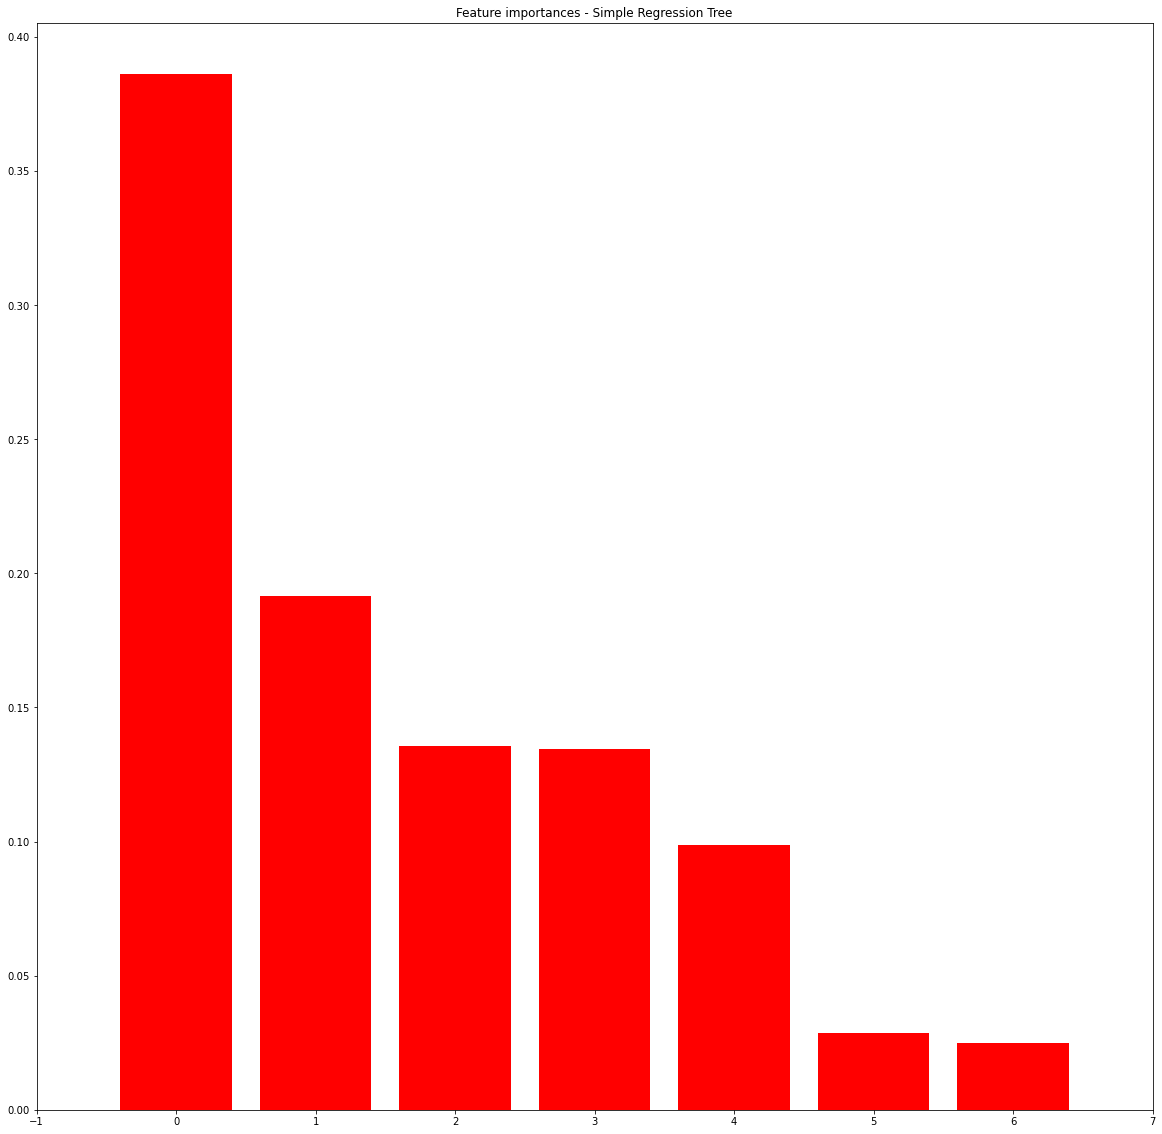

In [41]:
Reg_Tree1 = grid.best_estimator_

feature_names = list(X_train.columns)

importances = Reg_Tree1.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f'{f} feature {feature_names[indices[f]]} {importances[indices[f]]}')


plt.figure(figsize=(20, 20))
plt.title("Feature importances - Simple Regression Tree")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xlim([-1, X_train.shape[1]])
plt.show()